<a href="https://colab.research.google.com/github/EmiliaJarochowska/Echinoid_phylogeny/blob/main/Phylogenetic_tree_from_morphological_characters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phylogenetic tree from morphological characters

This code carries out a simple hierarchical clustering on the morphological character matrix from Bear et al. (2022) [link text](https://archive.org/details/cnx-org-col11569), modified from ["Building a phylogenetic tree"](https://www.khanacademy.org/science/ap-biology/natural-selection/phylogeny/a/building-an-evolutionary-tree) by the Khan Academy

In [ ]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy # might only work via Anaconda?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from google.colab import files # for file upload & download

In [3]:
uploads = files.upload() # upload your distance matrix here

Saving lecture_example.xlsx to lecture_example.xlsx


Import the file from Excel using `pandas`:

In [9]:
df0 = pd.read_excel(r"lecture_example.xlsx") # turn .xlsx file into data frame
df0

,Character,Lamprey,Antelope,Bald_eagle,Alligator,Sea_bass
0,Lungs,0,1,1,1,0
1,Jaws,0,1,1,1,1
2,Feathers,0,0,1,0,0
3,Gizzard,0,0,1,1,0
4,Fur,0,1,0,0,0


The matrix has taxa as columns and characters as rows so we need to transpose it:

In [10]:
df = df0.T
df

,0,1,2,3,4
Character,Lungs,Jaws,Feathers,Gizzard,Fur
Lamprey,0,0,0,0,0
Antelope,1,1,0,0,1
Bald_eagle,1,1,1,1,0
Alligator,1,1,0,1,0
Sea_bass,0,1,0,0,0


Now we put the names into a separate matrix and keep only the values of characters

In [11]:
Taxa = df.index.tolist()[1:] # select taxon names
Characters = df.iloc[1:, :] # select character vaues

We need to change the type of the character values recognized by `pandas`

In [12]:
sequences_str = Characters.values.astype(np.uint8)

Calculate distance matrix using [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance)

In [16]:
distance_matrix = squareform(pdist(sequences_str, metric='euclidean'))

Visualize the distance matrix

Text(0, 0.5, 'Distance')

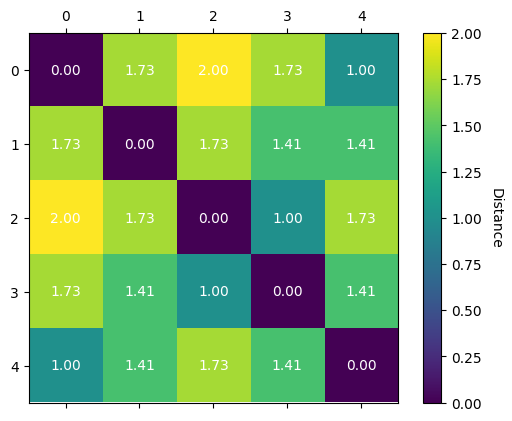

In [18]:
fig, ax = plt.subplots()
cax = ax.matshow(distance_matrix, cmap='viridis')

# Distance values for matrix cells
for i in range(len(sequences_str)):
    for j in range(len(sequences_str)):
        ax.text(j, i, f'{distance_matrix[i, j]:.2f}', ha='center', va='center', color='white')

# Add color bar
cbar = fig.colorbar(cax)
cbar.ax.set_ylabel('Distance', rotation=270, labelpad=15)

Create a tree using a clustering algorithm. Here we use [UPGMA](https://en.wikipedia.org/wiki/UPGMA). That is indicated by the parameter `method='average'`, see [Scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) for details.

In [20]:
Z = linkage(pdist(sequences_str, metric='euclidean'), method='average')

Plot the tree

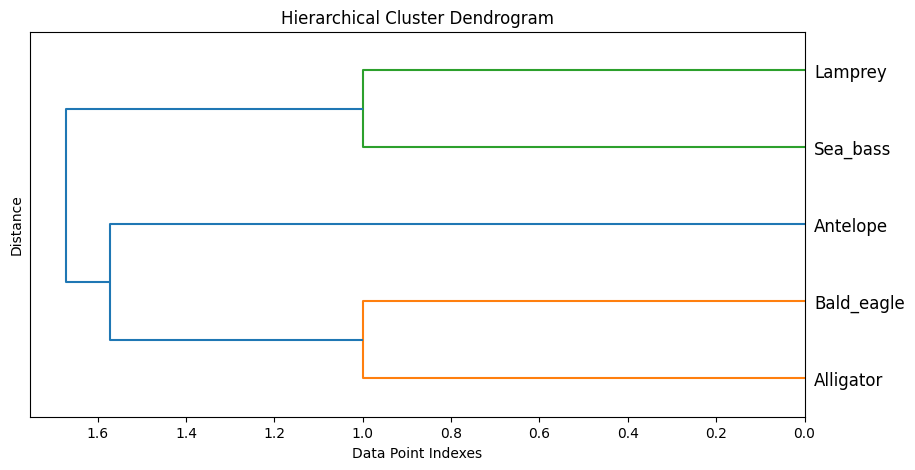

In [23]:
plt.figure(figsize=(10, 5))
dendrogram(Z,
            orientation='left',
            labels=Taxa,
            distance_sort='descending',
            show_leaf_counts=False
          )
plt.title('Hierarchical Cluster Dendrogram')
plt.xlabel('Data Point Indexes')
plt.ylabel('Distance')
plt.show()